## Case: "In-Vehicle Coupon Recommendation"

### 1. Frame the Problem

a. What is the objective of this case study (in business terms)? Refer to <a href="https://jmlr.org/papers/volume18/16-003/16-003.pdf">Wang et al. (2017)</a> for further details on the data set (especially Appendix B). <br>
b. Is the problem supervised or unsupervised? <br>
c. What is the classification objective? <br>
d. Describe a comparable problem? Can you reuse experience or tools? <br>
e. Which numeric value is most correlated?

Your Answer / Code Below:

In [ ]:
# a:
# Objective: Predict customer' coupon usage in an in-vehicle recommender system. 
# Business Goal: Optimize coupon targeting strategies for local businesses. 
# Coupon usage is predicted with the following attributes:
## User: Demographics, age, income, frequency of visits to venues, etc.
## Contextual: Driving destination, weather, passenger, location. 
## Coupon: Expiration time 

In [ ]:
# b: It's supervised -> classification

In [ ]:
# c: Classify/predict of categorial variable based on attributes (see a)
# -> user's responsive (Y = coupon use, yes=1 or no=0)

In [ ]:
# d: Reusable experience: I trained AI models which predict CTR on banner personalization
# It's also predicted based on user, contex. & behav. attributes, e.g. time on site, page viewed
# So yes, would be a comparabable problem to what we did so far
# Reusable method: We use random forest for this, so could be a good choice

### 2. Get the Data

a. Load required packages for data analysis (e.g., pandas as pd, numpy as np, os, etc.). <br>
b. Load the file "in-vehicle-coupon-recommendation.csv", using the pd.read_csv() command. Call the dataframe 'd'. <br>

Your Answer / Code Below:

In [ ]:
# a: Load libs and data for further analysis (+ install and update if needed)
# !pip install pandas
# !pip install --upgrade pandas
# !pip install matplotlib
# !pip install scikit-learn
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [ ]:
# b: Load files from temporary files system (sorry google, didn't wanna share)
d = pd.read_csv("in-vehicle-coupon-recommendation.csv")
d

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12679,Home,Partner,Rainy,55,6PM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,1
12680,Work,Alone,Rainy,55,7AM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,0,1,1
12681,Work,Alone,Snowy,30,7AM,Coffee House,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,0
12682,Work,Alone,Snowy,30,7AM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,1,0,1,0


### 3. Explore the Data

*a*. Print the first 5 rows of the data set. <br>
b. How many observations (rows) and features (columns, excl. 'Y') does the data set contain? <br>
c. Does the data set contain any missing values? If yes, name the variables with NaN's. <br>
d. What are the class shares of the variable 'Y'? What does it mean if Y=1 in the given context? <br>
e. Which numeric feature is correlated most strongly with Y? <br>

Your Answer / Code Below:

In [ ]:
# feature -> without the predictor variables, only explainaratory variables
# a: Print
d.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


In [ ]:
# b: Number of observations & features
d
# Answer: Number of observation: 12684, Number of Features: 25 (26th column is outcome variable Y)"

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12679,Home,Partner,Rainy,55,6PM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,1
12680,Work,Alone,Rainy,55,7AM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,0,1,1
12681,Work,Alone,Snowy,30,7AM,Coffee House,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,0
12682,Work,Alone,Snowy,30,7AM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,1,0,1,0


In [ ]:
# c: Find missing data by using sum of isna values in d:
print(d.isna().sum())
# Answer: The following attributes miss data: 
# 'car', 'Bar', 'CoffeeHouse', 'Carry', 'RestaurantLessThan20', 'Restaurant 20To50'

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64


('car',
 'Bar',
 'CoffeeHouse',
 'Carry',
 'RestaurantLessThan20',
 'Restaurant 20To50')

In [ ]:
# d. What are the class shares of the variable 'Y'? What does it mean if Y=1 in the given context?
# Answer 1: Class Shares of Variable 'Y': Y=0 is ≈56.8%, Y=1 is ≈43.2%
# Answer 2: 'Y=1' is this context means that user use the coupon, which was displayed in the in-car promotion

import pandas as pd

def calculate_class_shares(d, target_variable='Y'):
  if target_variable not in d.columns:
    print(f"Error: The column '{target_variable}' was not found in the DataFrame.")
    return None

  class_counts = d[target_variable].value_counts()
  total_count = len(d)

  class_proportions = class_counts / total_count
  class_percentages = class_proportions * 100

  class_shares_d = pd.DataFrame({
      'Count': class_counts,
      'Proportion': class_proportions,
      'Percentage': class_percentages
  })

  return class_shares_d.sort_values(by='Percentage', ascending=False)

class_shares = calculate_class_shares(d)


if class_shares is not None:
  print(class_shares)

   Count  Proportion  Percentage
Y                               
1   7210    0.568433   56.843267
0   5474    0.431567   43.156733


With original data types as per CSV

In [ ]:
# e. Which numeric feature is correlated most strongly with Y?
# Answer: Most correlated num. feature with Y is 'toCoupon_GEQ25min' with a neg. correlation of -0,103633 to Y
# Hint: Because toCoupon_GEQ5min is numeric but always 1, no correlation can be calculated, so we get NaN

# Drop all non-numerica values from original dataframe
def drop_non_numeric_columns(d):
  numeric_df = d.select_dtypes(include=['number'])
  return numeric_df

numeric_df = drop_non_numeric_columns(d)
numeric_df

# calculate the correlation matrix
correlation_matrix = numeric_df.corr()

# display the correlation matrix
correlation_matrix

,temperature,has_children,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
temperature,1.000000,-0.019716,NaN,-0.155332,-0.216254,0.097085,-0.097085,0.061240
has_children,-0.019716,1.000000,NaN,0.078211,-0.013722,-0.031620,0.031620,-0.045557
toCoupon_GEQ5min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
toCoupon_GEQ15min,-0.155332,0.078211,NaN,1.000000,0.324984,-0.303533,0.303533,-0.081602
toCoupon_GEQ25min,-0.216254,-0.013722,NaN,0.324984,1.000000,-0.192319,0.192319,-0.103633
direction_same,0.097085,-0.031620,NaN,-0.303533,-0.192319,1.000000,-1.000000,0.014570
direction_opp,-0.097085,0.031620,NaN,0.303533,0.192319,-1.000000,1.000000,-0.014570
Y,0.061240,-0.045557,NaN,-0.081602,-0.103633,0.014570,-0.014570,1.000000


Optional: 

In [ ]:
# As the feature 'age' was a categorical datatypes, because they contained a few strings, 
# but mostly represented numbers, I tried to convert into an Int to check correlation
# So, I dropped the character values and calculated the correlation between 'age' and 'Y'

# The goal was to ensure that we don't miss out on potential correlation
# RESULT: The correlation between age and Y is: -0.029439616103902406, 
# so it does not have a higher correlation than 'toCoupon_GEQ25min'

# Create a new DataFrame to avoid modifying the original
new_df = d.copy()

# Drop rows where 'age' is "50plus" or "below21"
new_df = new_df[~new_df['age'].isin(['50plus', 'below21'])]

# Convert the 'age' column to integer
# Use errors='coerce' to turn non-convertible values into NaN
new_df['age'] = pd.to_numeric(new_df['age'], errors='coerce').astype('Int64')

# Display the new DataFrame and the data type of the 'age' column
new_df

# Check correlation
correlation_age_y = new_df['age'].corr(new_df['Y'])
print(f"The correlation between age and Y is: {correlation_age_y}, so it does not have a higher correlation than 'toCoupon_GEQ25min'")

The correlation between age and Y is: -0.029439616103902406, so it does not have a higher correlation than 'toCoupon_GEQ25min'


### 4. Prepare the Data 1/2

a. Run the following command to drop the following 4 variables: <br>
*d = d.drop(['toCoupon_GEQ5min', 'toCoupon_GEQ15min', 'direction_same', 'car'], axis=1).* <br>
b. Why does the feature 'direction_same' provide no (additional) useful information? <br>
c. Sample a test set, containing 20% of the data, and a training set, containing the remaining 80%. Set a seed for reproducibility. <br>
d. How many observations are in the test set and training set? <br>
e. What are the class shares of the variable 'Y' in the test set and training set, respectively? <br>

Your Answer / Code Below:

In [ ]:
# a:
d = d.drop(['toCoupon_GEQ5min', 'toCoupon_GEQ15min', 'direction_same', 'car'], axis=1)

In [ ]:
# b. Why does the feature 'direction_same' provide no (additional) useful information?
# Answer: 'direction_same' has a perfect negative correlation (-1) with 'direction_op'
# This indicates multicollinearity
# Therefore, including it is redundant and suitable for removal)

In [ ]:
# c. Sample a test set, containing 20% of the data, and a training set, containing the remaining 80%. Set a seed for reproducibility.
train_df, test_df = train_test_split(d, test_size=0.2, random_state=42)

In [ ]:
# d. How many observations are in the test set and training set?
len(test_df)
# Answer 1: Number of observations in the test set: 2537

2537

In [ ]:
len(train_df)
# Answer 2: Number of observations in the training set: 10147

10147

In [ ]:
# e. What are the class shares of the variable 'Y' in the test set and training set, respectively?
# Answer 1: Class shares of the variable 'Y' in the test set: Y=1 is 55.54%, Y=0 is 44.46%
test_class_shares = calculate_class_shares(test_df)
print(test_class_shares)

   Count  Proportion  Percentage
Y                               
1   1409     0.55538   55.538037
0   1128     0.44462   44.461963


In [ ]:
# Answer 2: Class shares of the variable 'Y' in the training set: Y=1 is 57.17%, Y=0 is 42.83%
train_class_shares= calculate_class_shares(train_df)
print(train_class_shares)

   Count  Proportion  Percentage
Y                               
1   5801    0.571696   57.169607
0   4346    0.428304   42.830393


### 4. Prepare the Data 2/2

a. Drop 'Y' from the training set and store the resulting dataframe as 'X_train'. Do the same for the test set, storing it as 'X_test'. <br>
b. Store 'Y' from the training set as 'y_train'. Do the same for the test set, storing its 'Y' as 'y_test'. <br>
c. Use sklearn's Pipeline() function to create a pipeline that preprocesses the data (e.g., standardizing numeric features and applying one-hot-encoding to categorical features). You can, of course, explore if more elaborate feature engineering improves performance. <br> **Important:** Remember to fit the pipeline only on the training set ('X_train') using the 'pipeline.fit_transform()' function. Store the resulting dataframe as 'X_train_prepared'. <br>
d. Apply the pipeline also to 'X_test'. Store the resulting dataframe as 'X_test_prepared'. On the test set, use only the 'pipeline.transform()' function, not: 'pipeline.fit_transform()'.

Your Answer / Code Below:

In [ ]:
#a: Drop 'Y' from the training set and store the resulting dataframe as 'X_train'
# Store 'Y' from the training set as 'y_train'
X_train = train_df.drop('Y', axis=1)
y_train = train_df['Y']

In [ ]:
#b: Drop 'Y' from the test set and store the resulting dataframe as 'X_test'
# Store 'Y' from the test set as 'y_test'
X_test = test_df.drop('Y', axis=1)
y_test = test_df['Y']

In [ ]:
# c: Pipeline data to pre-process
# Identify numeric and categorical columns
numeric_features = X_train.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X_train.select_dtypes(include=['object', 'category']).columns

# Create transformers
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Create ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# Full pipeline (you can add a model here if needed later)
pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

# Fit only on training data and transform
X_train_prepared = pipeline.fit_transform(X_train)

In [ ]:
# d: Apply pipepline also to X_test
# Transform the test set ('X_test') using the fitted pipeline
X_test_prepared = pipeline.transform(X_test)

### 5. Shortlist Promising Models

a. Which methods covered in class could be used to address this problem? <br>
b. Briefly explain your method choice and which method you expect to perform best. Train at least 3 different machine learning methods. <br>
c. For each method, run *N*-fold cross-validation to compute the mean performance on the *N* folds. <br>
d. Plot the cross-validation results. <br>
**Important:** Do not assess model performance on the test set yet. <br>

Your Answer / Code Below:

In [ ]:
# a: Which methods could be used (based on class): 
# Answer: Logistic regression, Random Forest, XGBoost, SVM, KNN, Decision Tree, Neural networks, Stacking of any of them
# Because they all are usable for binary classificiation tasks

In [ ]:
# b. Briefly explain your method choice and which method you expect to perform best. Train at least 3 different machine learning methods.
# Answer: I assume to perform best: XGBoost, Random forest or Stack of XGBoost and Random Forest to combine strenghts, because:
# 1. Random Forest reduces variance through bagging and averaging multiple decision trees
# -> improving generalization and robustness to overfitting  
# 2. XGBoost reduces bias by iteratively correcting errors of weak learners through gradient boosting
# -> often achieving higher accuracy on structured data
# 3. Stacking combines both methods to potentially capture the strengths:
# -> variance reduction (Random Forest) and bias correction (XGBoost)

# Train at least 3 models, but I choose to train most of them:

#!pip install xgboost
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression # Common meta-model for stacking
import xgboost as xgb

# --- 1. Define Individual Models ---

# 1. Random Forest
rf_model = RandomForestClassifier(random_state=42)

# 2. XGBoost
xgb_model = xgb.XGBClassifier(objective='binary:logistic', # or appropriate objective for your task
                              eval_metric='logloss', # or appropriate metric for your task
                              random_state=42,
                              n_jobs=-1 # Use multiple cores for XGBoost itself
                             )

# 3. SVM
# SVC requires scaled data (provided by your pipeline).
# probability=True is needed for stacking with LogisticRegression meta-estimator
svm_model = SVC(probability=True, random_state=42)

# 4. Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)

# 5. K-Nearest Neighbors (KNN)
knn_model = KNeighborsClassifier(n_jobs=-1) # Default n_neighbors=5

# --- Define Meta-Model for Stacking ---
meta_model = LogisticRegression(random_state=42, n_jobs=-1)

# --- Define the list of base estimators for the Stacked Model ---
# These are the *instances* defined above
stack_rf_xgb_estimators = [
    ('rf', rf_model),
    ('xgb', xgb_model)
]

# --- Define Scoring Metrics and Outer CV Folds ---
scoring = ['precision', 'recall', 'accuracy', 'f1']
cv_folds = 5 # Number of folds for the outer cross-validation

# Assume X_train_prepared and y_train are defined elsewhere and available in the environment
# X_train_prepared = ... # Your preprocessed training features
# y_train = ...        # Your training labels

In [ ]:
# Reset results (uncommend if needed):
# cv_results.clear()
# results_df.iloc[:0]

In [ ]:
# c: For each method, run N-fold cross-validation (in this case 5 fold) to compute the mean performance
# --- Define Stacked Model Instance ---
# Uses estimators and meta_model defined in Part 1
stacked_rf_xgb_model = StackingClassifier(estimators=stack_rf_xgb_estimators, # Uses list from Part 1
                                          final_estimator=meta_model,       # Uses meta_model from Part 1
                                          cv=5, # Use 5-fold internal CV for stacking (common practice)
                                          n_jobs=-1
                                         )

# --- List of All Models to be Cross-Validated ---
# Include both individual models (instances from Part 1) and the stacked model instance defined just above
all_models_for_cv = {
    "Random Forest": rf_model,     # Instance from Part 1
    "XGBoost": xgb_model,          # Instance from Part 1
    "SVM": svm_model,              # Instance from Part 1
    "Decision Tree": dt_model,     # Instance from Part 1
    "KNN": knn_model,              # Instance from Part 1
    "Stacked (RF + XGB)": stacked_rf_xgb_model # Instance defined in this block
}

# --- Dictionary to Store All Results ---
cv_results = {} # Initialize the results dictionary

# --- Perform N-fold Cross-Validation for All Models ---
# Assumes cv_folds, scoring, X_train_prepared, y_train are available from Part 1
print(f"Performing {cv_folds}-fold Cross-Validation for All Models with metrics: {', '.join(scoring)}")
print("-" * 80)

# Iterate through the dictionary of all models defined above
for name, model in all_models_for_cv.items():
    print(f"Evaluating {name}...")
    try:
        # Perform cross-validation using cross_validate
        # n_jobs=-1 uses all available CPU cores for cross_validate itself
        scores = cross_validate(model, X_train_prepared, y_train,
                                cv=cv_folds, scoring=scoring, n_jobs=-1,
                                return_train_score=False) # We only need test scores

        # Compute and store the mean for each metric
        mean_scores = {metric: np.mean(scores[f'test_{metric}']) for metric in scoring}
        cv_results[name] = mean_scores # Store results

        print(f"  Done.")

    except Exception as e:
        print(f"  An error occurred during CV for {name}: {e}")
        cv_results[name] = {"Error": str(e)} # Store error message

print("-" * 80)

Performing 5-fold Cross-Validation for All Models with metrics: precision, recall, accuracy, f1
--------------------------------------------------------------------------------
Evaluating Random Forest...
  Done.
Evaluating XGBoost...
  Done.
Evaluating SVM...
  Done.
Evaluating Decision Tree...
  Done.
Evaluating KNN...
  Done.
Evaluating Stacked (RF + XGB)...
  Done.
--------------------------------------------------------------------------------



Cross-Validation Mean Scores (5-Fold) - All Models:
Sorted by 'precision' (Descending):
                    precision  recall  accuracy     f1
Stacked (RF + XGB)     0.7755  0.8273    0.7644 0.8006
XGBoost                0.7666  0.8181    0.7536 0.7915
Random Forest          0.7633  0.8299    0.7556 0.7952
SVM                    0.7489  0.8242    0.7415 0.7847
Decision Tree          0.7230  0.7116    0.6792 0.7172
KNN                    0.6858  0.7292    0.6541 0.7068


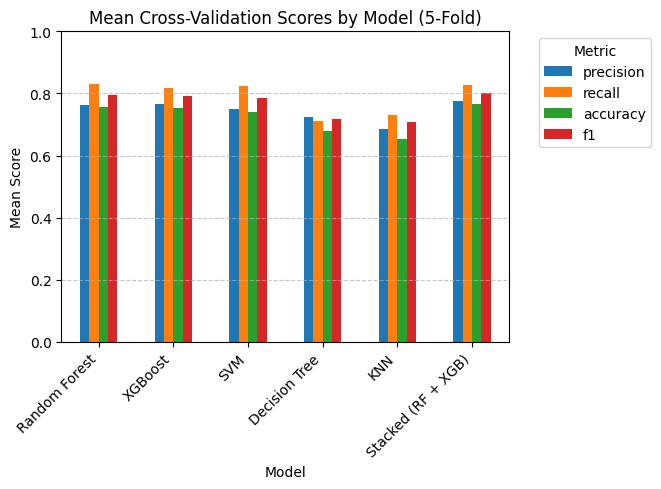

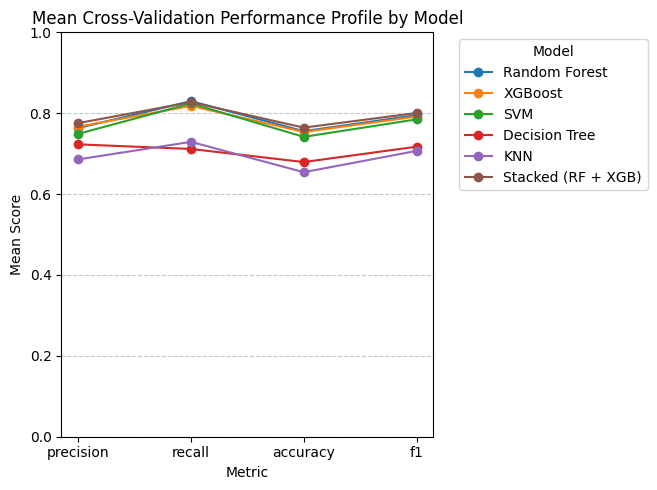

In [ ]:
# d: Plot n-fold performance results (as table and as visualizations)
# Interpretation: As assumed the stack seems to work best

import matplotlib.pyplot as plt
import pandas as pd # Import pandas again just in case this block is run separately

# Assume cv_results dictionary is available from the previous code blocks
# Assume scoring list is available from the previous code blocks
# Assume cv_folds is available

# --- Print Final Output of All Results ---
print(f"\nCross-Validation Mean Scores ({cv_folds}-Fold) - All Models:")

# Use pandas to display the results in a clear table format
try:
    # Filter out models with errors before creating DataFrame
    display_results = {k: v for k, v in cv_results.items() if "Error" not in v}

    if display_results:
        results_df = pd.DataFrame(display_results).T # Transpose to have models as rows and metrics as columns
        # Ensure columns are in the desired order of metrics and only include valid metrics
        valid_scoring_cols = [metric for metric in scoring if metric in results_df.columns]
        results_df = results_df[valid_scoring_cols]

        # --- Add Sorting ---
        # Sort the DataFrame by the first valid metric in the scoring list, in descending order
        if valid_scoring_cols:
            sort_by_metric = valid_scoring_cols[0] # Sort by the first metric, change if needed
            results_df_sorted = results_df.sort_values(by=sort_by_metric, ascending=False)
            print(f"Sorted by '{sort_by_metric}' (Descending):")
            print(results_df_sorted.to_string(float_format='%.4f')) # Format floats and ensure all is printed
        else:
             print("No valid metrics to sort by.")
             print(results_df.to_string(float_format='%.4f')) # Print unsorted if no valid metrics


    else:
        print("No successful cross-validation results to display in DataFrame.")

except Exception as e:
    print(f"Could not display results using pandas DataFrame: {e}")

# --- Prepare Data for Plotting (Do this once) ---
# Filter out models with errors before creating DataFrame for plotting
plot_results = {k: v for k, v in cv_results.items() if "Error" not in v}

if not plot_results:
    print("\nNo successful cross-validation results available to plot.")
else:
    # Create DataFrame for plotting
    results_df = pd.DataFrame(plot_results).T

    # Ensure columns are in the desired order of metrics for plotting
    # Filter for metrics that are actually in the results_df columns
    valid_scoring_cols = [metric for metric in scoring if metric in results_df.columns]
    results_df = results_df[valid_scoring_cols]

    # --- Plotting the Results (Bar Chart) ---
    # Plotting as a grouped bar chart
    # DECREASED figsize here
    # Consider sorting the DataFrame used for plotting if you want bars/lines ordered
    # For plotting, you might sort by a different metric or keep the original order
    # For now, we'll use the original DataFrame order for plotting
    ax_bar = results_df.plot(kind='bar', figsize=(8, 5)) # Reduced size to (8, 5)

    plt.title(f'Mean Cross-Validation Scores by Model ({cv_folds}-Fold)')
    plt.xlabel('Model')
    plt.ylabel('Mean Score')
    plt.ylim(0, 1) # Scores are typically between 0 and 1
    plt.xticks(rotation=45, ha='right') # Rotate model names for readability
    plt.legend(title='Metric', bbox_to_anchor=(1.05, 1), loc='upper left') # Place legend outside the plot
    plt.grid(axis='y', linestyle='--', alpha=0.7) # Add horizontal grid lines

    plt.tight_layout(rect=[0, 0, 0.85, 1]) # Adjust layout to make space for the legend
    plt.show()

    # --- Plotting the Results (Line Plot) ---
    # Plotting lines. Transposing the DataFrame puts metrics on the index (x-axis)
    # and models as columns (which become separate lines)
    # DECREASED figsize here
    ax_line = results_df.T.plot(kind='line', marker='o', figsize=(8, 5)) # Reduced size to (8, 5)

    plt.title('Mean Cross-Validation Performance Profile by Model')
    plt.xlabel('Metric')
    plt.ylabel('Mean Score')
    plt.ylim(0, 1) # Scores are typically between 0 and 1

    # Set x-axis ticks to be the metric names
    plt.xticks(ticks=range(len(valid_scoring_cols)), labels=valid_scoring_cols, rotation=0)

    plt.legend(title='Model', bbox_to_anchor=(1.05, 1), loc='upper left') # Place legend outside the plot
    plt.grid(axis='y', linestyle='--', alpha=0.7) # Add horizontal grid lines

    plt.tight_layout(rect=[0, 0, 0.85, 1]) # Adjust layout to make space for the legend
    plt.show()

### 6. Fine-tune the System

a. Fine-tune the hyperparameters of the best-performing method (e.g., the number of trees in a Random Forest classifier). Again, run cross-validation on the training data. You are free to use either random or grid search. <br>
b. Once you are confident about your final model, measure its performance on the test set to estimate the generalization error. <br>
c. Print the confusion matrix of your final model, comparing its predictions against 'y_test'. Report also precision, recall, accuracy, and the F1-score. <br>

Your Answer / Code Below:

In [ ]:
# a: Fine-tune the hyperparameters of the best-performing method and perform cross-validation on training data
# As stacked RF + XGB had highest performance, I used it for further tuning
# -> but validate RF tuned as well (Appendix 2)
# -> I choose random search as it is more efficient still find almost equivalent performing models, as per:
# Source 1: https://jcbi.org/index.php/Main/article/view/697
# Source 2: https://doi.org/10.55581/ejeas.1581494
# Source 3: https://dl.acm.org/doi/abs/10.5555/2188385.2188395
# But results from Grid Search can be found in Appendix 1 to proof this assumption

# I used 30 iteration to be reliable but also time/ressource efficient

from sklearn.model_selection import RandomizedSearchCV
import time

print("\n" + "-" * 80)
print("Hyperparameter Tuning for Stacked Classifier (RF + XGB) + Evaluation")
print("-" * 80)

# --- Timing Start ---
start_time_stacked_tuning = time.time()

# Define base estimators again (to avoid interference with previously used ones)
base_rf = RandomForestClassifier(random_state=42)
base_xgb = xgb.XGBClassifier(objective='binary:logistic',
                             eval_metric='logloss',
                             random_state=42,
                             n_jobs=-1)

stack_rf_xgb = StackingClassifier(
    estimators=[('rf', base_rf), ('xgb', base_xgb)],
    final_estimator=meta_model,
    cv=cv_folds,
    n_jobs=-1
)

# Define hyperparameter space (for base models inside the stack)
param_distributions_stack = {
    'rf__n_estimators': [100, 200, 300],
    'rf__max_depth': [None, 10, 20],
    'xgb__n_estimators': [50, 100, 200],
    'xgb__max_depth': [3, 6, 10]
}

print("[1/3] Setting up RandomizedSearchCV for stacked model...")
stack_search = RandomizedSearchCV(
    estimator=stack_rf_xgb,
    param_distributions=param_distributions_stack,
    n_iter=30,
    cv=cv_folds,
    scoring='f1',
    n_jobs=-1,
    random_state=42,
    verbose=2
)

# --- Tuning ---
print("[2/3] Running hyperparameter tuning... (this may take several minutes)")
start_tuning_stack = time.time()
stack_search.fit(X_train_prepared, y_train)
end_tuning_stack = time.time()
print(f"Tuning completed in {(end_tuning_stack - start_tuning_stack):.2f} seconds.")
print(f"Best parameters: {stack_search.best_params_}")

# --- Cross-validation of Best Model ---
print("[3/3] Cross-validating best-tuned stacked model...")
best_stacked_model = stack_search.best_estimator_
start_cv_stack = time.time()
scores_best_stack = cross_validate(best_stacked_model, X_train_prepared, y_train,
                                   cv=cv_folds, scoring=scoring, n_jobs=-1,
                                   return_train_score=False)
end_cv_stack = time.time()
print(f"Cross-validation completed in {(end_cv_stack - start_cv_stack):.2f} seconds.")

# Store results
mean_scores_best_stack = {metric: np.mean(scores_best_stack[f'test_{metric}']) for metric in scoring}
cv_results["Tuned Stacked (RF + XGB) Randomized  Search"] = mean_scores_best_stack
print("✅ Tuned stacked model evaluation complete.")

# --- Final Output ---
end_time_stacked_tuning = time.time()
print(f"\n⏱️ Total time for stacked model tuning and evaluation: {(end_time_stacked_tuning - start_time_stacked_tuning):.2f} seconds.")

# Display updated results
results_df = pd.DataFrame(cv_results).T
results_df = results_df[scoring]
print("\nUpdated Cross-Validation Mean Scores (5-Fold):")
results_df_sorted = results_df.sort_values(by='f1', ascending=False)
print(results_df_sorted.to_string(float_format='%.4f'))


--------------------------------------------------------------------------------
Hyperparameter Tuning for Stacked Classifier (RF + XGB) + Evaluation
--------------------------------------------------------------------------------
[1/3] Setting up RandomizedSearchCV for stacked model...
[2/3] Running hyperparameter tuning... (this may take several minutes)
Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV] END rf__max_depth=10, rf__n_estimators=100, xgb__max_depth=6, xgb__n_estimators=50; total time=   3.8s
[CV] END rf__max_depth=None, rf__n_estimators=300, xgb__max_depth=6, xgb__n_estimators=100; total time=  34.1s
[CV] END rf__max_depth=10, rf__n_estimators=100, xgb__max_depth=3, xgb__n_estimators=100; total time=   3.9s
[CV] END rf__max_depth=10, rf__n_estimators=100, xgb__max_depth=3, xgb__n_estimators=100; total time=   4.9s
[CV] END rf__max_depth=10, rf__n_estimators=100, xgb__max_depth=3, xgb__n_estimators=100; total time=   4.1s
[CV] END rf__max_depth=None, rf_

[CV] END rf__max_depth=10, rf__n_estimators=100, xgb__max_depth=6, xgb__n_estimators=50; total time=   3.9s
[CV] END rf__max_depth=None, rf__n_estimators=100, xgb__max_depth=3, xgb__n_estimators=50; total time=  12.5s
[CV] END rf__max_depth=10, rf__n_estimators=100, xgb__max_depth=6, xgb__n_estimators=100; total time=   4.0s
[CV] END rf__max_depth=10, rf__n_estimators=100, xgb__max_depth=6, xgb__n_estimators=100; total time=   3.9s
[CV] END rf__max_depth=None, rf__n_estimators=300, xgb__max_depth=3, xgb__n_estimators=50; total time=  35.0s
[CV] END rf__max_depth=20, rf__n_estimators=200, xgb__max_depth=10, xgb__n_estimators=100; total time=  21.4s
[CV] END rf__max_depth=None, rf__n_estimators=100, xgb__max_depth=6, xgb__n_estimators=100; total time=  11.6s
[CV] END rf__max_depth=None, rf__n_estimators=200, xgb__max_depth=6, xgb__n_estimators=50; total time=  22.2s
[CV] END rf__max_depth=10, rf__n_estimators=100, xgb__max_depth=10, xgb__n_estimators=50; total time=   4.1s
[CV] END rf__m

In [ ]:
#Interpretation: Tuned Stacked (RF + XGB) Random Search seems to be the best 
# -> +1% in P, A, F1 compared with RF and RGBBost approx.
# Hyperparameters are: 
# {'xgb__n_estimators': 100, 'xgb__max_depth': 6, 'rf__n_estimators': 300, 'rf__max_depth': None}

In [ ]:
# b. Once you are confident about your final model, measure its performance on the test set to estimate the generalization error.

import numpy as np
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score, classification_report
import time
import pandas as pd # Ensure pandas is imported if not already


print("\n" + "=" * 80)
print("Step b & c: Final Model Evaluation on Test Set (Using best_estimator_ directly)")
print("=" * 80)

# Assume best_stacked_model is the best_estimator_ from the RandomizedSearchCV fit
# Assume X_test_prepared, y_test are available

# b. Measure performance on the test set using the existing best_stacked_model

print("[1/1] Evaluating the best_stacked_model directly on the test dataset...")
# Note: We are using the model instance *already trained* during the RandomizedSearchCV process.
# This instance was not trained on the entire X_train_prepared, y_train data simultaneously.
start_eval_test = time.time()
# Make predictions on the test set
y_pred = best_stacked_model.predict(X_test_prepared)
end_eval_test = time.time()
print(f"Prediction on test set completed in {(end_eval_test - start_eval_test):.2f} seconds.")

# c. Print confusion matrix and report metrics

print("\n--- Performance Metrics on Test Set ---")

# Calculate individual metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")


Step b & c: Final Model Evaluation on Test Set (Using best_estimator_ directly)
[1/1] Evaluating the best_stacked_model directly on the test dataset...
Prediction on test set completed in 0.18 seconds.

--- Performance Metrics on Test Set ---
Accuracy: 0.7607
Precision: 0.7631
Recall: 0.8254
F1-score: 0.7930


In [ ]:
# c. Print the confusion matrix of your final model, comparing its predictions against 'y_test'. 
# Report also precision, recall, accuracy, and the F1-score.
print("\n--- Confusion Matrix ---")
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Print confusion matrix using pandas for better readability (optional)
# Assuming binary classification (0 and 1)
cm_df = pd.DataFrame(cm,
                     index=['Actual Negative (0)', 'Actual Positive (1)'],
                     columns=['Predicted Negative (0)', 'Predicted Positive (1)'])

print(cm_df)

# Alternatively, print directly
# print(cm)

print("\nEvaluation on test set complete using best_stacked_model directly.")
print("=" * 80)


--- Confusion Matrix ---
                     Predicted Negative (0)  Predicted Positive (1)
Actual Negative (0)                     767                     361
Actual Positive (1)                     246                    1163

Evaluation on test set complete using best_stacked_model directly.


### 7. Present Your Solution

a. Ensure your code is documented well. <br>
b. Briefly summarize your results (e.g., best-performing method, hyperparameter choice). Use the dedicated cell below.<br>
c. Describe your key learnings: what went well, what didn't go well? <br>
d. What are your system's limitations? What would you try or change if you had more time for this machine learning project? <br>

Your Answer / Code Below:

# a: done

# b: Summarize results
* Best performing: Stack of XGBoost and Random Forest, as it balances strenght and weaknesses of both approaches (also showed in research)
* Hyperparemeter choice: {'xgb__n_estimators': 100, 'xgb__max_depth': 6, 'rf__n_estimators': 300, 'rf__max_depth': None}
    * 
* Low generalization error -> 5 fold cross validation achieves almost same results as model on test set:
* 5 Fold Cross Validation: A = 76.6%, P = 77.6%, R = 82.8%, F1 = 80.1% 
* Test Set: A = 76%, P = 76.3%, R = 82.5%, F1 = 79.3%
* -> Difference (5 CV - Test): A = -0.6% less, P = -1.3, R = -0.3%, F1 = -0.8%

# c: Key learnings:
* Went well:
    * Training went smootly
    * Data was balanced (no pre-preprocessing needed)
    * Data exploration didn't show any data issues
    * Evaluation was relatively as showing all revant metrics provides a balanced view
    * Hyperparameter tuning helped to figure out best setting
* Didn't go well:
    * Dealing with the list which stored all results, as I had to erase all data often to not get duplicate resultg
    * Waiting time was quite high due to limited computational resources
    * It was not very clear which method provided the highest results, as there were sometimes less than 1% performance differences

# c: System limitations:
* Eventhough I did train all learned models and used grid and random search, there are few things I would changes:
    1. What would be interesting is to use deep learning / neural networks or a specific ML for this case, e.g. CatBoost-> because I might find patterns that I excluded through my feature engineering
    2. Reduce to only one best performing method, as different some reasons suggest that stacking improves performance as in our result <a href="https://ieeexplore.ieee.org/document/9858471">(Liu, W. /Jia, L. (2022)</a>, <b>but</b> also introduces complexity (<a href="https://link.springer.com/chapter/10.1007/978-3-031-29573-7_9">Zhou et al. (2023)</a>, <a href="https://ieeexplore.ieee.org/document/10803246">Senthilvadivu et al. (2024)</a>)
    3. Try out other stack if they significantly improve performance
    4. Plot XAI visuals, e.g. SHAP values or LIME, which would be more accessible with Random Forest model
    5. Combine features or created new features in feature engineering / data preprocessing
    6. Understand misclassifications seen in Confusion Matrix and try to find solutions for it

⬇ **Please do not forget to fill out the 3 lines in the box below.** ⬇

* BEST_ACCURACY =  76%  # accuracy on the TEST set of the winning method (in %)
* NB_OF_METHODS =  6  # number of different ML methods (e.g., SVM, RF, XGBoost, RF, stack, etc.):
* NB_OF_FIGURES =  8 # number of different figures (e.g., pie chart, bar chart, confusion matrix, etc.)

### 8. Launch

a. Save your final model. You do not need to submit it together with your Jupyter Notebook on Canvas. You can use the following command:

In [ ]:
import joblib
joblib.dump(best_stacked_model, "my_model.pkl")

['my_model.pkl']

### Congrats. You made it!

# Appendix 1: Stack Grid Search

In [ ]:
# a: Fine-tune the hyperparameters of the best-performing method and perform cross-validation on training data
# As stacked RF + XGB had highest performance, I used it for further tuning 
# -> Grid Search provides exhaustive search for proof (Appendix 2)

from sklearn.model_selection import GridSearchCV, cross_validate # Import GridSearchCV
from sklearn.ensemble import RandomForestClassifier, StackingClassifier # Import StackingClassifier
import xgboost as xgb # Import xgboost
import pandas as pd
import numpy as np
import time

# Assuming X_train_prepared, y_train, cv_folds, and scoring are already defined
# from previous steps in the original notebook.
# Assuming meta_model is also defined.
# For demonstration purposes, let's create dummy variables if they don't exist:
from sklearn.model_selection import StratifiedKFold
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression # Example meta_model

# Create dummy data and cross-validation folds if not already defined
try:
    X_train_prepared, y_train
    cv_folds
    scoring
    meta_model
    cv_results
except NameError:
    print("Creating dummy data and variables for demonstration...")
    X_train_prepared, y_train = make_classification(n_samples=100, n_features=20, random_state=42)
    cv_folds = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    scoring = ['f1', 'recall', 'precision', 'accuracy', 'roc_auc']
    meta_model = LogisticRegression(random_state=42) # Example meta_model
    cv_results = {} # Initialize cv_results

print("\n" + "-" * 80)
print("Hyperparameter Tuning for Stacked Classifier (RF + XGB) + Evaluation using GridSearchCV") # Updated print
print("-" + "-" * 79)

# --- Timing Start ---
start_time_stacked_tuning = time.time()

# --- Initialize cv_results for this specific run ---
# Initialize cv_results dictionary to store results for this run
cv_results = {}


# Define base estimators again (to avoid interference with previously used ones)
base_rf = RandomForestClassifier(random_state=42)
base_xgb = xgb.XGBClassifier(objective='binary:logistic',
                             eval_metric='logloss',
                             random_state=42,
                             n_jobs=-1)

stack_rf_xgb = StackingClassifier(
    estimators=[('rf', base_rf), ('xgb', base_xgb)],
    final_estimator=meta_model,
    cv=cv_folds,
    n_jobs=-1
)

# Define hyperparameter grid (for base models inside the stack)
# Note: Using param_grid for GridSearchCV
# Changed variable name to param_grid_stack for clarity with GridSearchCV
param_grid_stack = {
    'rf__n_estimators': [100, 200, 300],
    'rf__max_depth': [None, 10, 20],
    'xgb__n_estimators': [50, 100, 200],
    'xgb__max_depth': [3, 6, 10]
}

print("[1/3] Setting up GridSearchCV for stacked model...") # Updated print
stack_search = GridSearchCV( # Changed from RandomizedSearchCV to GridSearchCV
    estimator=stack_rf_xgb,
    param_grid=param_grid_stack, # Changed from param_distributions to param_grid
    cv=cv_folds,
    scoring='f1', # Using 'f1' as per your original code
    n_jobs=-1,
    verbose=2
)

# --- Tuning ---
print("[2/3] Running hyperparameter tuning with GridSearchCV... (this may take significantly longer)") # Updated print
start_tuning_stack = time.time()
stack_search.fit(X_train_prepared, y_train)
end_tuning_stack = time.time()
print(f"Tuning completed in {(end_tuning_stack - start_tuning_stack):.2f} seconds.")
print(f"Best parameters: {stack_search.best_params_}")
print(f"Best F1 score from GridSearchCV: {stack_search.best_score_:.4f}") # Updated print


# --- Cross-validation of Best Model ---
print("[3/3] Cross-validating best-tuned stacked model with all scoring metrics...") # Updated print
best_stacked_model = stack_search.best_estimator_
start_cv_stack = time.time()
scores_best_stack = cross_validate(best_stacked_model, X_train_prepared, y_train,
                                 cv=cv_folds, scoring=scoring, n_jobs=-1,
                                 return_train_score=False)
end_cv_stack = time.time()
print(f"Cross-validation completed in {(end_cv_stack - start_cv_stack):.2f} seconds.")

# Store results
mean_scores_best_stack = {metric: np.mean(scores_best_stack[f'test_{metric}']) for metric in scoring}
cv_results["Tuned Stacked (RF + XGB) GridSearch"] = mean_scores_best_stack # Updated key for clarity
print("✅ Tuned stacked model evaluation complete.")

# --- Final Output ---
end_time_stacked_tuning = time.time()
print(f"\n⏱️ Total time for stacked model tuning and evaluation: {(end_time_stacked_tuning - start_time_stacked_tuning):.2f} seconds.")

# Display updated results
results_df = pd.DataFrame(cv_results).T
results_df = results_df[scoring]
print("\nUpdated Cross-Validation Mean Scores (5-Fold):")
results_df_sorted = results_df.sort_values(by='f1', ascending=False)
print(results_df_sorted.to_string(float_format='%.4f'))


--------------------------------------------------------------------------------
Hyperparameter Tuning for Stacked Classifier (RF + XGB) + Evaluation using GridSearchCV
--------------------------------------------------------------------------------
[1/3] Setting up GridSearchCV for stacked model...
[2/3] Running hyperparameter tuning with GridSearchCV... (this may take significantly longer)
Fitting 5 folds for each of 81 candidates, totalling 405 fits
[CV] END rf__max_depth=10, rf__n_estimators=100, xgb__max_depth=6, xgb__n_estimators=50; total time=   3.7s
[CV] END rf__max_depth=None, rf__n_estimators=100, xgb__max_depth=3, xgb__n_estimators=50; total time=  11.1s
[CV] END rf__max_depth=10, rf__n_estimators=100, xgb__max_depth=6, xgb__n_estimators=100; total time=   4.1s
[CV] END rf__max_depth=10, rf__n_estimators=100, xgb__max_depth=6, xgb__n_estimators=100; total time=   3.8s
[CV] END rf__max_depth=None, rf__n_estimators=300, xgb__max_depth=3, xgb__n_estimators=50; total time=  34

# Appendix 2: Tuned RF

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

# Define parameter grid for Randomized Search
param_dist = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# RandomSearchCV with cross-validation
random_search = RandomizedSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_distributions=param_dist,
    n_iter=30,  # Number of random combinations to try
    cv=cv_folds,
    scoring='f1',
    n_jobs=-1,
    random_state=42,
    verbose=1
)

print("\nPerforming hyperparameter tuning for Random Forest...")
random_search.fit(X_train_prepared, y_train)

# Best model from tuning
best_rf_model = random_search.best_estimator_
print(f"\nBest parameters found: {random_search.best_params_}")

# Cross-validate the best model using the original scoring metrics
print("\nEvaluating best-tuned Random Forest with cross-validation...")
scores_tuned_rf = cross_validate(best_rf_model, X_train_prepared, y_train,
                                 cv=cv_folds, scoring=scoring, n_jobs=-1,
                                 return_train_score=False)

# Store results
mean_scores_tuned_rf = {metric: np.mean(scores_tuned_rf[f'test_{metric}']) for metric in scoring}
cv_results["Tuned Random Forest Random Search"] = mean_scores_tuned_rf

# Optional: Display updated results
results_df = pd.DataFrame(cv_results).T
results_df = results_df[scoring]
print("\nUpdated Cross-Validation Mean Scores (5-Fold):")
print(results_df.to_string(float_format='%.4f'))


Performing hyperparameter tuning for Random Forest...
Fitting 5 folds for each of 30 candidates, totalling 150 fits

Best parameters found: {'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 40, 'bootstrap': True}

Evaluating best-tuned Random Forest with cross-validation...

Updated Cross-Validation Mean Scores (5-Fold):
                                     precision  recall  accuracy     f1
Tuned Stacked (RF + XGB) GridSearch     0.7767  0.8293    0.7661 0.8021
Tuned Random Forest Random Search       0.7632  0.8392    0.7592 0.7994


In [ ]:
# Convert to PDF
!pip install --upgrade nbconvert playwright
!playwright install chromium

In [ ]:
# Convert to PDF

!jupyter nbconvert "mariotruss_PTMMA_Introduction_To_Machine_Learning_Coupon_Case_Submission_Template.ipynb" --to HTML

[NbConvertApp] Converting notebook mariotruss_PTMMA_Introduction_To_Machine_Learning_Coupon_Case_Submission_Template.ipynb to HTML
[NbConvertApp] WARNING | Alternative text is missing on 2 image(s).
[NbConvertApp] Writing 576327 bytes to mariotruss_PTMMA_Introduction_To_Machine_Learning_Coupon_Case_Submission_Template.html
